Project 5: Fake News Detector

Fake news detection is a real-world application of text classification in Machine Learning.
The goal of this project is to build a model that can automatically classify a news article as Real or Fake based on its textual content.

In [10]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

I used a Kaggle Fake News dataset that consists of two files:
*   Fake.csv → fake news articles
*   True.csv → real news articles
Each article contains textual news content.
We assign labels:
*  0 → Fake news
*  1 → Real news
These two datasets are merged and shuffled before training.

In [11]:
from google.colab import files
print("Upload Fake.csv:")
uploaded = files.upload()
for fn in uploaded.keys():
  print(f'Uploaded fake csv file "{fn}" with length {len(uploaded[fn])} bytes')
print("\n Upload True.csv:")
uploaded = files.upload()
for fn in uploaded.keys():
  print(f'Uploaded true csv file "{fn}" with length {len(uploaded[fn])} bytes')

Upload Fake.csv:


Saving Fake.csv to Fake (2).csv
Uploaded fake csv file "Fake (2).csv" with length 62789876 bytes

 Upload True.csv:


Saving True.csv to True (1).csv
Uploaded true csv file "True (1).csv" with length 53582940 bytes


In [12]:
fake = pd.read_csv("Fake.csv")
real = pd.read_csv("True.csv")
fake['label'] = 0
real['label'] = 1
df = pd.concat([fake, real], axis=0)
df = df.sample(frac=1).reset_index(drop=True)
df = df[['text', 'label']]
print(df.head())
print("Dataset shape:", df.shape)

                                                text  label
0  This week s cold open for Saturday Night Live ...      0
1  MARAWI CITY, Philippines (Reuters) - Philippin...      1
2  Is it possible the  good  Dr. Dao was simply s...      0
3  After White House Press Secretary Sean Spicer ...      0
4  The chorus of voices saying,  Show us your tax...      0
Dataset shape: (44898, 2)


Raw text contains:<br>


*   Capital letters<br>
*   Punctuation<br>
*   Numbers<br>
*   Extra spaces<br>

Machine learning models cannot work directly on raw text.<br>
So, I clean the text to:<br>
*  Convert to lowercase<br>
*  Remove punctuation and numbers<br>
*  Keep only meaningful words

In [13]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text
df['text'] = df['text'].apply(clean_text)

Machine learning models require numerical input.<br>
TF-IDF (Term Frequency–Inverse Document Frequency):
*   Gives higher importance to meaningful words
*   Reduces the weight of very common words
*   Works extremely well for text classification tasks

In [14]:
X = df['text']
y = df['label']
vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english'
)
X_tfidf = vectorizer.fit_transform(X)
print("TF-IDF shape:", X_tfidf.shape)

TF-IDF shape: (44898, 5000)


To evaluate the model fairly:
*   80% data → Training
*   20% data → Testing<br>

The model will only be tested on unseen data.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)

I use Multinomial Naive Bayes, which:
*   Is fast
*   Works well with TF-IDF features
*   Is commonly used in text classification

In [16]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

Next, I evaluated the model using:
*   Accuracy
*   Confusion Matrix
* Precision
* Recall
* F1-score

These metrics tell us how well the model distinguishes fake and real news.

In [17]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 93.9086859688196

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4717
           1       0.94      0.94      0.94      4263

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



A confusion matrix shows:
*   Correct predictions
*   False positives
*   False negatives


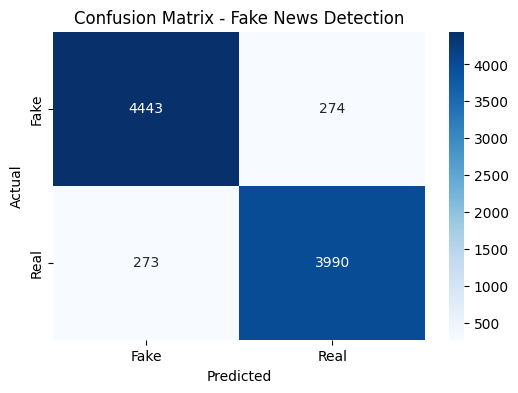

In [18]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Fake News Detection")
plt.show()

This project demonstrates how Machine Learning can be applied to combat misinformation using NLP techniques.